## Observations and Insights 

In [ ]:
#Observations
# Based on the box plots and the regression line, the heavier the mouse is, the bigger the tumor is. This is understandable and may prove weight is a big factor to cancer.
#the mean and median of the drug regimen's are very similar for each drug, meaning that there are not too many outliers and consistent results.
#Capomulin and Ramicane both seem much more effective relative to the other drugs.
#There are no particular gender skews, as the gender of the mice were basically even. 
#Ceftamin and Propiva were the least effective drugs and potentially should be ceased in testing. 


In [327]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pylab as p
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Data_Set = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
Data_Set

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [332]:
# Checking the number of mice.
Data_Set.count() ["Mouse ID"]

1893

In [333]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Data_Set[Data_Set.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [334]:
# Optional: Get all the data for the duplicate mouse ID. 
Data_Set[Data_Set.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [335]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean = Data_Set.drop_duplicates("Mouse ID")
Clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [288]:
# Checking the number of mice in the clean DataFrame.
Clean["Mouse ID"].count()

249

## Summary Statistics

In [289]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_round_groupby = Data_Set.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = round(Drug_round_groupby["Tumor Volume (mm3)"].mean(),2)
median = round(Drug_round_groupby["Tumor Volume (mm3)"].median(),2)
variance = round(Drug_round_groupby["Tumor Volume (mm3)"].var(),2)
Standard_Deviation = round(Drug_round_groupby["Tumor Volume (mm3)"].std(),2)
Sem = round(Drug_round_groupby["Tumor Volume (mm3)"].sem(),2)


                                      

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Summary_Stats_DataFrame = pd.DataFrame({"Mean": mean, "Median": median, "Var": variance , "Standard Deviation": Standard_Deviation, "SEM": Sem})

Summary_Stats_DataFrame

,Mean,Median,Var,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [290]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
round(Drug_round_groupby['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"]),2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

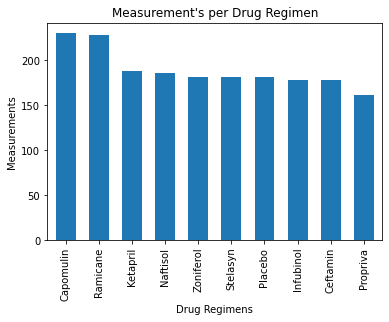

In [291]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Measurement = Data_Set["Drug Regimen"].value_counts()
Regimen = Data_Set["Drug Regimen"].unique()


# # Graph
bar_chart = Measurement.plot.bar(width=0.6, title="Measurement's per Drug Regimen")
bar_chart.set_xlabel("Drug Regimens")
bar_chart.set_ylabel("Measurements");

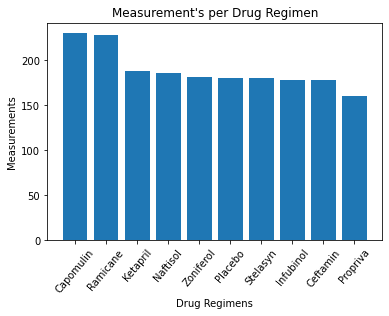

In [292]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]

fig, ax = plt.subplots()
ax.bar(Regimen, Measurement);
ax.set(title="Measurement's per Drug Regimen", 
       xlabel="Drug Regimens",
       ylabel="Measurements");
plt.xticks(rotation=50);

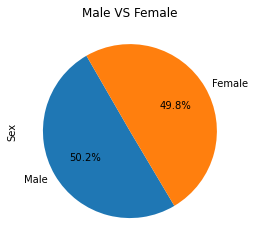

In [293]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = Clean["Sex"].unique()
sex_set_up = Clean["Sex"].value_counts()

# # Graph
sex_set_up.plot.pie(title = "Male VS Female", 
                          autopct = "%1.1f%%", startangle=120);


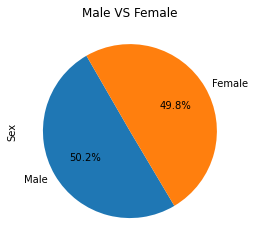

In [294]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, ax = plt.subplots(figsize=(4,4))
ax.pie(sex_set_up, 
       labels=sex, 
       autopct="%1.1f%%", 
       startangle=120);
ax.set(title = "Male VS Female",
       ylabel = "Sex");

## Quartiles, Outliers and Boxplots

In [295]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_Time_Point = round(Data_Set.groupby("Mouse ID").max()["Timepoint"],2)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_With_Original = round(pd.merge(Last_Time_Point, Data_Set, on=("Mouse ID", "Timepoint")),2)

Merged_With_Original

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.71,0
245,z578,45,Ramicane,Male,11,16,30.64,0
246,z581,45,Infubinol,Female,24,25,62.75,3
247,z795,45,Naftisol,Female,13,29,65.74,3


In [296]:
# Put treatments into a list for for loop (and later for plot labels)
Medication = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)

CAP = []
RAM = []
INF = []
CEF = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in Merged_With_Original.iterrows():
    if row["Drug Regimen"] == Medication[0]:
        CAP.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == Medication[1]:
        RAM.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == Medication[2]:
        INF.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == Medication[3]:
        CEF.append(row['Tumor Volume (mm3)'])
    
    # add subset 
    
Drug_listed = pd.DataFrame({"Capomulin": CAP, "Ramicane": RAM, "Infubinol": INF, "Ceftamin": CEF})
    



In [297]:
   # Determine outliers using upper and lower bounds
Quartiles = Drug_listed[Medication[0]].quantile([.25,.5,.75])
BottomQuartile = Quartiles[0.25]
UpperQuartile = Quartiles[0.75]
InterQuartile = UpperQuartile - BottomQuartile

print(f'''{Medication[0]}
Bottom Quartile is: {BottomQuartile}
Upper Quartile is: {UpperQuartile}
Interquartile is: {InterQuartile}
The Median is: {Quartiles[0.5]}''')

Bottom_Quartile = BottomQuartile - (1.5*InterQuartile)
Upper_Quartile = UpperQuartile + (1.5*InterQuartile)
print(f''' Values Below {Bottom_Quartile} are the outliers."
Values over {UpperQuartile} are the outliers.''')


Quartiles = Drug_listed[Medication[1]].quantile([.25,.5,.75])
BottomQuartile = Quartiles[0.25]
UpperQuartile = Quartiles[0.75]
InterQuartile = UpperQuartile - BottomQuartile

print(f'''{Medication[1]}
Bottom Quartile is: {BottomQuartile}
Upper Quartile is: {UpperQuartile}
Interquartile is: {InterQuartile}
The Median is: {Quartiles[0.5]}''')

Bottom_Quartile = BottomQuartile - (1.5*InterQuartile)
Upper_Quartile = UpperQuartile + (1.5*InterQuartile)
print(f''' Values Below {Bottom_Quartile} are the outliers."
Values over {UpperQuartile} are the outliers.''')

Quartiles = Drug_listed[Medication[2]].quantile([.25,.5,.75])
BottomQuartile = Quartiles[0.25]
UpperQuartile = Quartiles[0.75]
InterQuartile = UpperQuartile - BottomQuartile

print(f'''{Medication[2]}
Bottom Quartile is: {BottomQuartile}
Upper Quartile is: {UpperQuartile}
Interquartile is: {InterQuartile}
The Median is: {Quartiles[0.5]}''')

Bottom_Quartile = BottomQuartile - (1.5*InterQuartile)
Upper_Quartile = UpperQuartile + (1.5*InterQuartile)
print(f''' Values Below {Bottom_Quartile} are the outliers."
Values over {UpperQuartile} are the outliers.''')

Quartiles = Drug_listed[Medication[3]].quantile([.25,.5,.75])
BottomQuartile = Quartiles[0.25]
UpperQuartile = Quartiles[0.75]
InterQuartile = UpperQuartile - BottomQuartile

print(f'''{Medication[3]}
Bottom Quartile is: {BottomQuartile}
Upper Quartile is: {UpperQuartile}
Interquartile is: {InterQuartile}
The Median is: {Quartiles[0.5]}''')

Bottom_Quartile = BottomQuartile - (1.5*InterQuartile)
Upper_Quartile = UpperQuartile + (1.5*InterQuartile)
print(f''' Values Below {Bottom_Quartile} are the outliers."
Values over {UpperQuartile} are the outliers.''')




Capomulin
Bottom Quartile is: 32.38
Upper Quartile is: 40.16
Interquartile is: 7.779999999999994
The Median is: 38.13
 Values Below 20.71000000000001 are the outliers."
Values over 40.16 are the outliers.
Ramicane
Bottom Quartile is: 31.56
Upper Quartile is: 40.66
Interquartile is: 9.099999999999998
The Median is: 36.56
 Values Below 17.910000000000004 are the outliers."
Values over 40.66 are the outliers.
Infubinol
Bottom Quartile is: 54.05
Upper Quartile is: 65.53
Interquartile is: 11.480000000000004
The Median is: 60.17
 Values Below 36.82999999999999 are the outliers."
Values over 65.53 are the outliers.
Ceftamin
Bottom Quartile is: 48.72
Upper Quartile is: 64.3
Interquartile is: 15.579999999999998
The Median is: 59.85
 Values Below 25.35 are the outliers."
Values over 64.3 are the outliers.


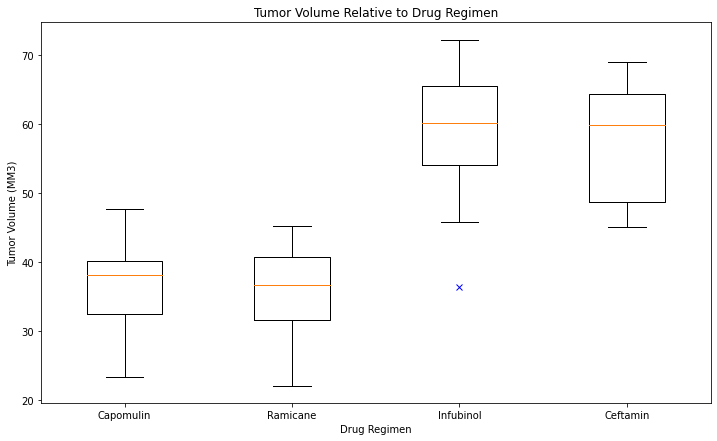

In [325]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
BOXPLOT = Drug_listed[Medication[0]], Drug_listed[Medication[1]], Drug_listed[Medication[2]], Drug_listed[Medication[3]]

fig, ax = plt.subplots(figsize=(12,7))
ax.boxplot(BOXPLOT, 0, 'bx')
ax.set(title = "Tumor Volume Relative to Drug Regimen",
       xlabel = "Drug Regimen",
       ylabel = "Tumor Volume (MM3)");
plt.xticks([1,2,3,4], Medication);


## Line and Scatter Plots

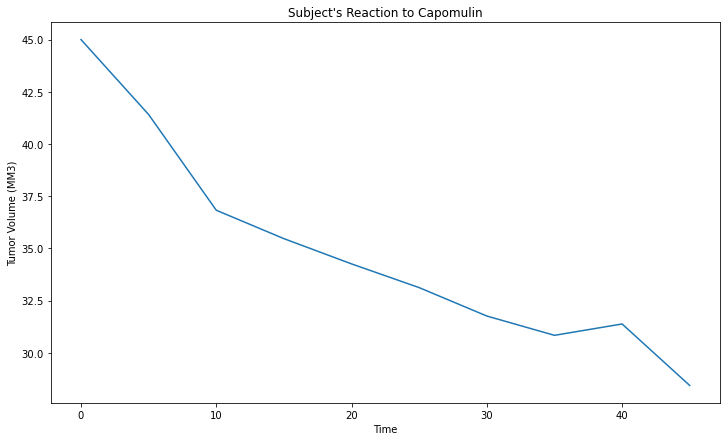

In [299]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
DS_Capomulin = Data_Set.loc[Data_Set["Drug Regimen"] == "Capomulin"]
Subject_ID = "m601"
Mice_Subject = DS_Capomulin.loc[Data_Set["Mouse ID"] == Subject_ID]

# # Define axis
TV = Mice_Subject["Tumor Volume (mm3)"]
TP = Mice_Subject["Timepoint"]

# # Graph
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(TP, TV);
ax.set(title = "Subject's Reaction to Capomulin",
       xlabel = "Time",
       ylabel = "Tumor Volume (MM3)");


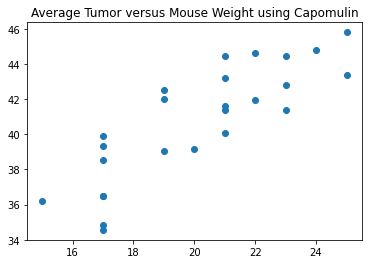

In [336]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Groupby_Capomulin = DS_Capomulin.groupby("Mouse ID")

#axis
Average_Tumor = Groupby_Capomulin["Tumor Volume (mm3)"].mean()
Mouse_Weight = Groupby_Capomulin["Weight (g)"].mean()

fig, ax = plt.subplots()

ax.scatter(Mouse_Weight, Average_Tumor);
ax.set(title = "Average Tumor versus Mouse Weight using Capomulin")
xlabel = "Weight"
ylabel = "Tumor Volume (MM3)"


## Correlation and Regression

In [337]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
CORRELATIONS = st.pearsonr(Average_Tumor, Mouse_Weight)
print(f"Correlation between Tumor and Weight is {round(CORRELATIONS[0],3)}")




Correlation between Tumor and Weight is 0.842


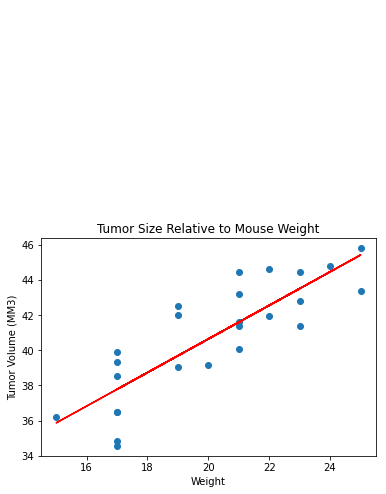

In [326]:
(Line_Slope, Line_Intercept, Line_P, Line_R, Line_stderr) = linregress(Mouse_Weight, Average_Tumor)
Regression_Values = (Mouse_Weight * Line_Slope) + Line_Intercept
Equation = "y = " + str(round(Line_Slope,2)) + "x + " + str(round(Line_Intercept,2))

fig, ax = plt.subplots()
ax.scatter(Mouse_Weight, Average_Tumor);
ax.plot(Mouse_Weight,Regression_Values,"r-")
ax.annotate(Equation, (15,58), color="red", fontsize="35")
ax.set(title="Tumor Size Relative to Mouse Weight",
       xlabel="Weight",
       ylabel="Tumor Volume (MM3)");